In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, FeatureAgglomeration, mean_shift, dbscan
from itertools import combinations

In [10]:
df_bear = pd.read_csv('bearing_final_data.csv', index_col=0)

In [11]:
df_bear

,a1_x_mean,a1_y_mean,a1_z_mean,a2_x_mean,a2_y_mean,a2_z_mean,rpm_mean,hz_mean,w_mean,a1_x_fft_mean,...,a1_z_amp_mean,a2_x_amp_mean,a2_y_amp_mean,a2_z_amp_mean,a1_x_amp_max,a1_y_amp_max,a1_z_amp_max,a2_x_amp_max,a2_y_amp_max,a2_z_amp_max
bearing_id,,,,,,,,,,,,,,,,,,,,,
2,-0.174032,-0.007636,-0.053353,-0.178986,0.024936,0.194061,1074.981634,17.916361,0.501160,3.459109,...,3.581353,2.521898,3.581353,3.662380,22.177219,17.707234,15.252773,21.194466,15.252773,17.707234
3,-0.172328,-0.002343,-0.039898,-0.121842,0.036149,0.183881,1149.927038,19.165451,0.513051,3.763797,...,3.917454,2.556373,3.917454,3.986035,22.810187,18.881881,16.024957,22.860777,16.024957,18.881881
4,-0.149644,-0.000549,-0.037679,-0.119574,0.030838,0.200699,1127.538630,18.792311,0.539426,3.636525,...,3.689783,2.293293,3.689783,3.834951,20.557838,15.777804,16.857276,19.053852,16.857276,15.777804
5,-0.146438,0.015268,-0.026678,-0.080799,0.034042,0.206547,1037.216452,17.286941,0.353715,3.409107,...,3.450111,2.671111,3.450111,3.702928,25.201937,18.334126,16.483506,22.290534,16.483506,18.334126
6,-0.143340,0.010808,-0.035890,0.380514,0.049622,0.266823,1121.730015,18.695500,0.473679,4.219683,...,4.892761,3.821588,4.892761,4.497673,33.557075,23.363376,25.477474,31.716083,25.477474,23.363376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,-0.230311,-0.004166,0.053886,-0.736975,0.007928,0.108286,977.960660,16.299344,0.439244,3.226409,...,3.604335,3.721795,3.604335,3.569131,21.267718,19.564344,21.532359,25.327678,21.532359,19.564344
97,-0.213683,-0.008270,0.039880,-0.713652,0.009315,0.095118,885.335761,14.755596,0.297943,2.566103,...,3.066380,3.268857,3.066380,3.137386,20.785152,20.271543,21.993971,21.459002,21.993971,20.271543
98,-0.245854,-0.009958,0.068156,-0.669722,0.012108,0.206580,1007.240234,16.787337,0.292290,3.137251,...,3.508802,3.768710,3.508802,3.550248,20.970713,19.775539,21.069309,24.970557,21.069309,19.775539


## KMeans Clustering

In [12]:
df_vib_amp = df_bear['a2_x_mean'].to_frame().join(df_bear['a2_x_amp_max'].to_frame())
df_vib_amp = df_vib_amp.reset_index()

Silhouette score: 0
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 7 7 7 7 7 7 7 7 7
 7 7 2 2 7 2 2 2 2 2 2 2 2 2 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 4 6 4 4 4 4 4 4
 4 4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


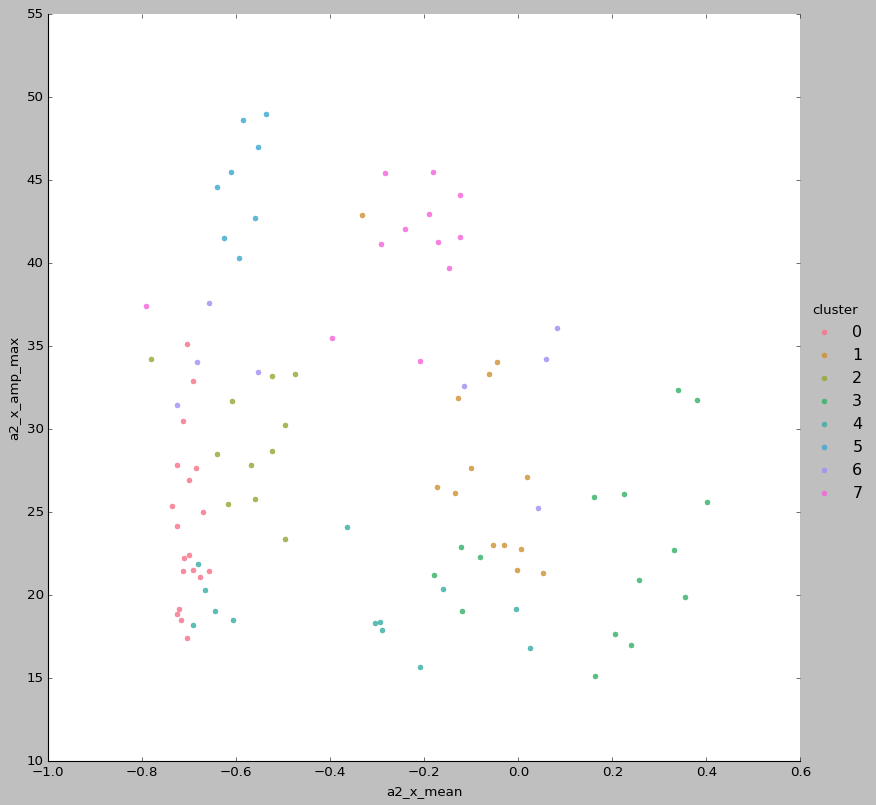

In [13]:
# fit a kmeans object to the dataset
kmeans = KMeans(init='k-means++').fit(df_vib_amp)

# labels and clusters are attributes of the object
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

# add cluster index to dataframe
cluster_labels = pd.Series(labels, name='cluster')
df_vib_amp = df_vib_amp.join(cluster_labels.to_frame())

# Score
print("Silhouette score: %d" %silhouette_score(df_vib_amp, labels))
print(labels)

# visualize clusters
plt.style.use('classic')
sns.lmplot(x='a2_x_mean', y='a2_x_amp_max',  height=10, data=df_vib_amp,
           fit_reg=False, hue='cluster')
plt.grid(False)
plt.show()

### Silhouette Score follow-up

In [39]:
arr = ['a2_x_mean', 'a2_y_mean', 'a2_z_mean', 'a2_x_fft_mean', 'a2_y_fft_mean', 'a2_z_fft_mean', 'a2_x_amp_mean', 'a2_y_amp_mean', 'a2_z_amp_mean', 'a2_x_amp_max', 'a2_y_amp_max', 'a2_z_amp_max']
r = 2
def iter_feature(arr, r):
    return list(combinations(arr, r))

feature_comb = iter_feature(arr,r)

In [40]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for index, tup in enumerate(feature_comb):
    element_one = tup[0]
    element_two = tup[1]
    df_vib_amp = df_bear[element_one].to_frame().join(df_bear[element_two].to_frame())
    df_vib_amp = df_vib_amp.reset_index()
    print(f"Features: {element_one} and {element_two}")

    # Generating the sample data from make_blobs
    # This particular setting has one distinct cluster and 3 clusters placed close
    # together.
    X = df_vib_amp
    range_n_clusters = [2, 3, 4, 5, 6, 7]
    for n_clusters in range_n_clusters:
            # Create a subplot with 1 row and 2 columns
        #fig, (ax1, ax2) = plt.subplots(1, 2)
        #fig.set_size_inches(18, 7)
        #    # The 1st subplot is the silhouette plot
        #    # The silhouette coefficient can range from -1, 1 but in this example all
        #    # lie within [-0.1, 1]
        #ax1.set_xlim([-0.1, 1])
        #    # The (n_clusters+1)*10 is for inserting blank space between silhouette
        #    # plots of individual clusters, to demarcate them clearly.
        #ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
            # Initialize the clusterer with n_clusters value and a random generator
                # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, init='k-means++', random_state=10)
        cluster_labels = clusterer.fit_predict(X)
                # The silhouette_score gives the average value for all the samples.
            # This gives a perspective into the density and separation of the formed
            # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
            # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        y_lower = 10
        '''
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        ax2.set_yticks([15,20,25,30,35,40,45,50])  # Clear the yaxis labels / ticks
        ax2.set_xticks([-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8])
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(df_vib_amp[element_one], df_vib_amp[element_two], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')
        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        #ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
        #            c="white", alpha=1, s=200, edgecolor='k')
    #
        #for i, c in enumerate(centers):
        #    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
        #                s=50, edgecolor='k')
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')'''

Features: a2_x_mean and a2_y_mean
For n_clusters = 2 The average silhouette_score is : 0.6186907470139782
For n_clusters = 3 The average silhouette_score is : 0.5767913115050158
For n_clusters = 4 The average silhouette_score is : 0.553233493228047
For n_clusters = 5 The average silhouette_score is : 0.5375511578670171
For n_clusters = 6 The average silhouette_score is : 0.5249985497847339
For n_clusters = 7 The average silhouette_score is : 0.5133509718483709
Features: a2_x_mean and a2_z_mean
For n_clusters = 2 The average silhouette_score is : 0.6188612435218437
For n_clusters = 3 The average silhouette_score is : 0.5772479495190245
For n_clusters = 4 The average silhouette_score is : 0.5539730201832986
For n_clusters = 5 The average silhouette_score is : 0.5366576669984205
For n_clusters = 6 The average silhouette_score is : 0.5250367500156636
For n_clusters = 7 The average silhouette_score is : 0.5146061178425838
Features: a2_x_mean and a2_x_fft_mean
For n_clusters = 2 The average 

Features: a2_x_mean and a2_z_mean
For n_clusters = 2 The average silhouette_score is : 0.6188612435218437
For n_clusters = 3 The average silhouette_score is : 0.5772479495190245
For n_clusters = 4 The average silhouette_score is : 0.5539730201832986
For n_clusters = 5 The average silhouette_score is : 0.5366576669984205
For n_clusters = 6 The average silhouette_score is : 0.5250367500156636
For n_clusters = 7 The average silhouette_score is : 0.5146061178425838


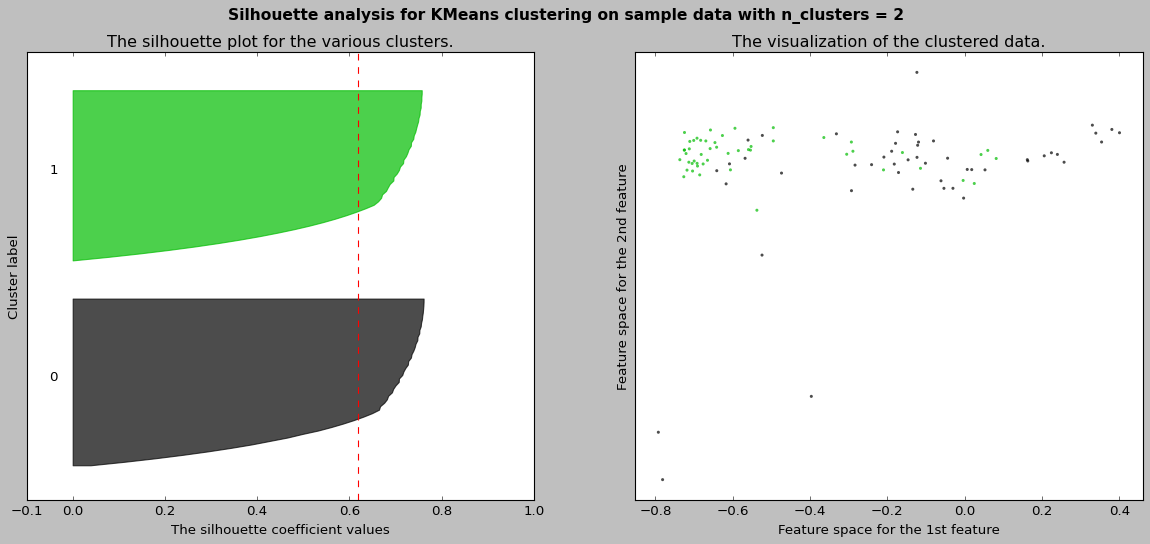

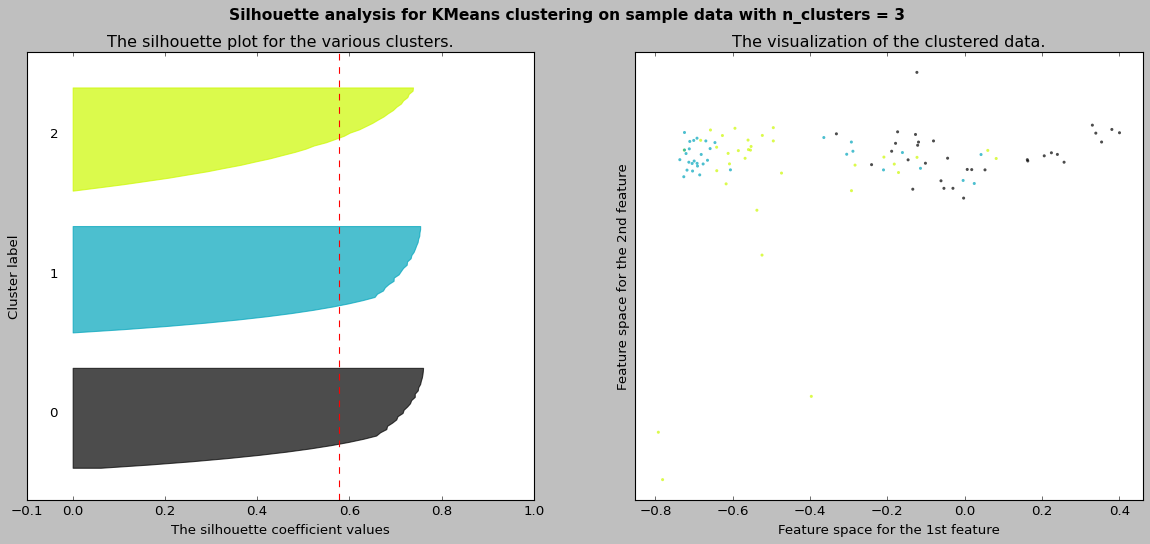

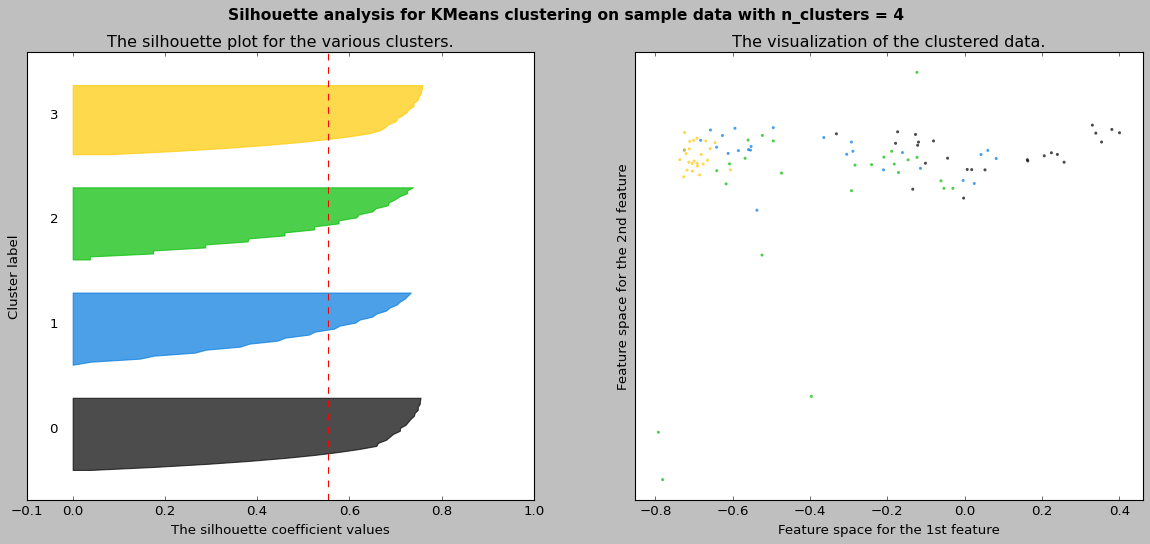

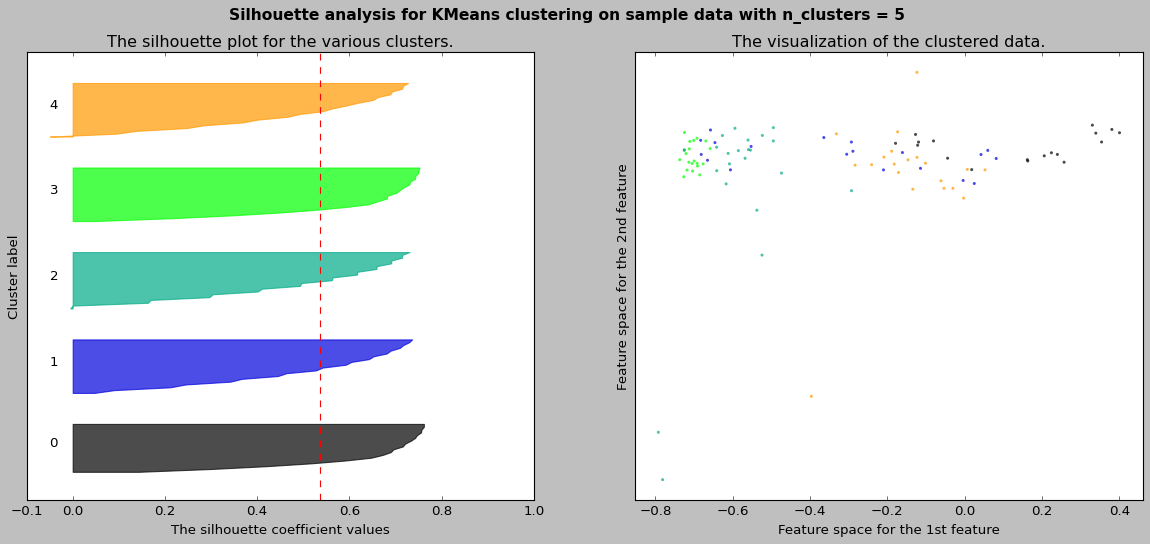

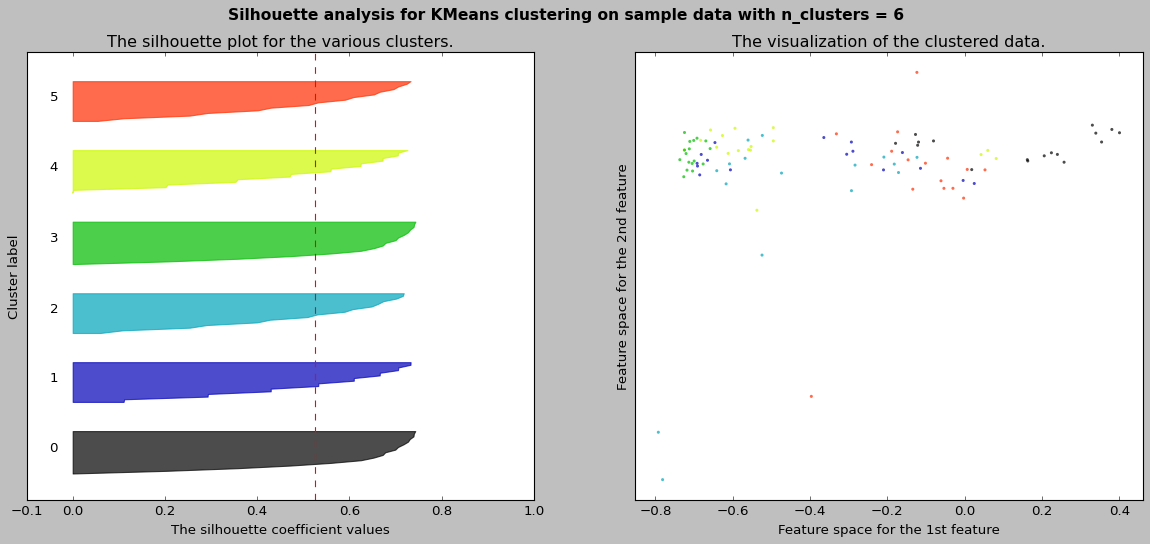

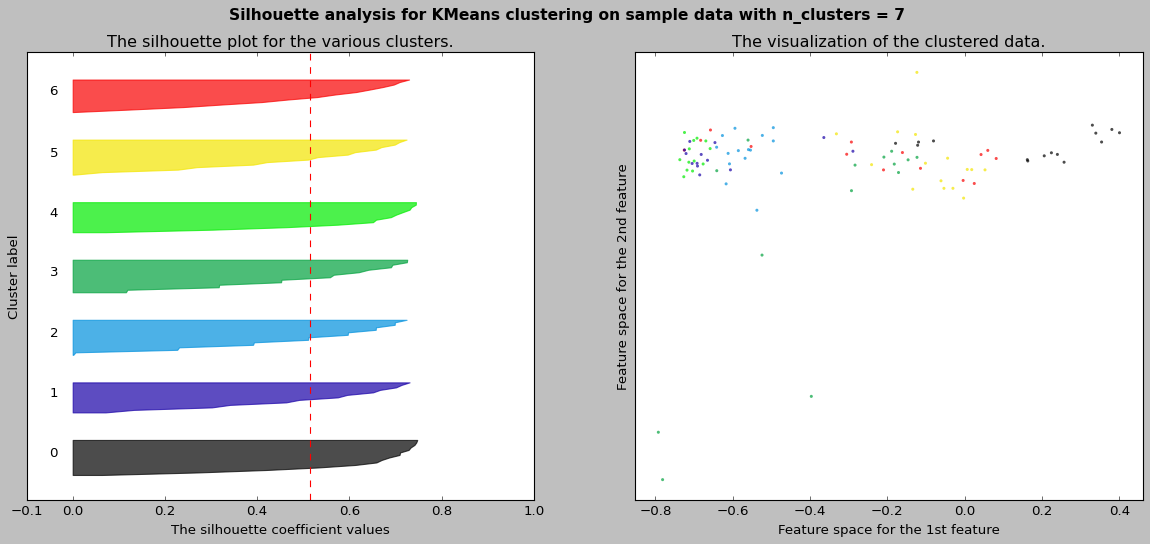

In [41]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

df_vib_amp = df_bear['a2_x_mean'].to_frame().join(df_bear['a2_z_mean'].to_frame())
df_vib_amp = df_vib_amp.reset_index()
print(f"Features: a2_x_mean and a2_z_mean")

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X = df_vib_amp
range_n_clusters = [2, 3, 4, 5, 6, 7]
for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    #    # The 1st subplot is the silhouette plot
    #    # The silhouette coefficient can range from -1, 1 but in this example all
    #    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    #    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    #    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
        # Initialize the clusterer with n_clusters value and a random generator
            # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', random_state=10)
    cluster_labels = clusterer.fit_predict(X)
            # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
        # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax2.set_yticks([15,20,25,30,35,40,45,50])  # Clear the yaxis labels / ticks
    ax2.set_xticks([-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8])
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_vib_amp['a2_x_mean'], df_vib_amp['a2_z_mean'], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    #ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
    #            c="white", alpha=1, s=200, edgecolor='k')
#
    #for i, c in enumerate(centers):
    #    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
    #                s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

In [23]:
array = ['a2_y_mean', 'a2_x_fft_mean', 'a2_y_fft_mean', 'a2_z_fft_mean', 'a2_x_amp_mean', 'a2_y_amp_mean', 'a2_z_amp_mean', 'a2_x_amp_max', 'a2_y_amp_max', 'a2_z_amp_max']

In [24]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for element in array:
    df_vib_amp = df_bear['a2_x_mean'].to_frame().join(df_bear['a2_z_mean'].to_frame()).join(df_bear[element].to_frame())
    df_vib_amp = df_vib_amp.reset_index()
    print(f"Features: a2_x_mean and a2_z_mean and {element}")

    # Generating the sample data from make_blobs
    # This particular setting has one distinct cluster and 3 clusters placed close
    # together.
    X = df_vib_amp
    range_n_clusters = [2, 3, 4, 5, 6, 7]
    for n_clusters in range_n_clusters:
            # Create a subplot with 1 row and 2 columns
        #fig, (ax1, ax2) = plt.subplots(1, 2)
        #fig.set_size_inches(18, 7)
        #    # The 1st subplot is the silhouette plot
        #    # The silhouette coefficient can range from -1, 1 but in this example all
        #    # lie within [-0.1, 1]
        #ax1.set_xlim([-0.1, 1])
        #    # The (n_clusters+1)*10 is for inserting blank space between silhouette
        #    # plots of individual clusters, to demarcate them clearly.
        #ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
            # Initialize the clusterer with n_clusters value and a random generator
                # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, init='k-means++', random_state=10)
        cluster_labels = clusterer.fit_predict(X)
                # The silhouette_score gives the average value for all the samples.
            # This gives a perspective into the density and separation of the formed
            # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
            # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        y_lower = 10
        '''
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        ax2.set_yticks([15,20,25,30,35,40,45,50])  # Clear the yaxis labels / ticks
        ax2.set_xticks([-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8])
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(df_vib_amp[element_one], df_vib_amp[element_two], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')
        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        #ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
        #            c="white", alpha=1, s=200, edgecolor='k')
    #
        #for i, c in enumerate(centers):
        #    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
        #                s=50, edgecolor='k')
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')'''

Features: a2_x_mean and a2_z_mean and a2_y_mean
For n_clusters = 2 The average silhouette_score is : 0.6185202303993942
For n_clusters = 3 The average silhouette_score is : 0.5765327496751518
For n_clusters = 4 The average silhouette_score is : 0.5528574390662281
For n_clusters = 5 The average silhouette_score is : 0.5369145266984755
For n_clusters = 6 The average silhouette_score is : 0.5238678602174942
For n_clusters = 7 The average silhouette_score is : 0.512377013008427
Features: a2_x_mean and a2_z_mean and a2_x_fft_mean
For n_clusters = 2 The average silhouette_score is : 0.6167843330260531
For n_clusters = 3 The average silhouette_score is : 0.5739636331273582
For n_clusters = 4 The average silhouette_score is : 0.5471809983534978
For n_clusters = 5 The average silhouette_score is : 0.529927450658724
For n_clusters = 6 The average silhouette_score is : 0.5183228341677412
For n_clusters = 7 The average silhouette_score is : 0.5014189793408687
Features: a2_x_mean and a2_z_mean and 

In [25]:
array_4 = ['a2_x_fft_mean', 'a2_y_fft_mean', 'a2_z_fft_mean', 'a2_x_amp_mean', 'a2_y_amp_mean', 'a2_z_amp_mean', 'a2_x_amp_max', 'a2_y_amp_max', 'a2_z_amp_max']

In [35]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for element in array_4:
    df_vib_amp = df_bear['a2_x_mean'].to_frame().join(df_bear['a2_y_mean'].to_frame()).join(df_bear['a2_z_mean'].to_frame()).join(df_bear[element].to_frame())
    df_vib_amp = df_vib_amp.reset_index()
    print(f"Features: a2_x_mean and a2_y_mean and a2_z_mean and {element}")

    # Generating the sample data from make_blobs
    # This particular setting has one distinct cluster and 3 clusters placed close
    # together.
    X = df_vib_amp
    range_n_clusters = [2, 3, 4, 5, 6, 7]
    for n_clusters in range_n_clusters:
            # Create a subplot with 1 row and 2 columns
        #fig, (ax1, ax2) = plt.subplots(1, 2)
        #fig.set_size_inches(18, 7)
        #    # The 1st subplot is the silhouette plot
        #    # The silhouette coefficient can range from -1, 1 but in this example all
        #    # lie within [-0.1, 1]
        #ax1.set_xlim([-0.1, 1])
        #    # The (n_clusters+1)*10 is for inserting blank space between silhouette
        #    # plots of individual clusters, to demarcate them clearly.
        #ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
            # Initialize the clusterer with n_clusters value and a random generator
                # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, init='k-means++', random_state=10)
        cluster_labels = clusterer.fit_predict(X)
                # The silhouette_score gives the average value for all the samples.
            # This gives a perspective into the density and separation of the formed
            # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
            # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        y_lower = 10
        '''
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        ax2.set_yticks([15,20,25,30,35,40,45,50])  # Clear the yaxis labels / ticks
        ax2.set_xticks([-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8])
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(df_vib_amp[element_one], df_vib_amp[element_two], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')
        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        #ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
        #            c="white", alpha=1, s=200, edgecolor='k')
    #
        #for i, c in enumerate(centers):
        #    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
        #                s=50, edgecolor='k')
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')'''

Features: a2_x_mean and a2_y_mean and a2_z_mean and a2_x_fft_mean
For n_clusters = 2 The average silhouette_score is : 0.6164868634004139
For n_clusters = 3 The average silhouette_score is : 0.5733619037988797
For n_clusters = 4 The average silhouette_score is : 0.5463003083101764
For n_clusters = 5 The average silhouette_score is : 0.5293495499541816
For n_clusters = 6 The average silhouette_score is : 0.5159713210246866
For n_clusters = 7 The average silhouette_score is : 0.4997217930780929
Features: a2_x_mean and a2_y_mean and a2_z_mean and a2_y_fft_mean
For n_clusters = 2 The average silhouette_score is : 0.6161822986121782
For n_clusters = 3 The average silhouette_score is : 0.5728052005415373
For n_clusters = 4 The average silhouette_score is : 0.5458570957520174
For n_clusters = 5 The average silhouette_score is : 0.5288335932267362
For n_clusters = 6 The average silhouette_score is : 0.5144779499145531
For n_clusters = 7 The average silhouette_score is : 0.4993912438514868
Feat

In [33]:
array_5 = ['a2_y_fft_mean', 'a2_z_fft_mean', 'a2_x_amp_mean', 'a2_y_amp_mean', 'a2_z_amp_mean', 'a2_x_amp_max', 'a2_y_amp_max', 'a2_z_amp_max']

In [36]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for element in array_5:
    df_vib_amp = df_bear['a2_x_mean'].to_frame().join(df_bear['a2_y_mean'].to_frame()).join(df_bear['a2_z_mean'].to_frame()).join(df_bear['a2_x_fft_mean'].to_frame()).join(df_bear[element].to_frame())
    df_vib_amp = df_vib_amp.reset_index()
    print(f"Features: a2_x_mean and a2_y_mean and a2_z_mean and a2_x_fft_mean and {element}")

    # Generating the sample data from make_blobs
    # This particular setting has one distinct cluster and 3 clusters placed close
    # together.
    X = df_vib_amp
    range_n_clusters = [2, 3, 4, 5, 6, 7]
    for n_clusters in range_n_clusters:
            # Create a subplot with 1 row and 2 columns
        #fig, (ax1, ax2) = plt.subplots(1, 2)
        #fig.set_size_inches(18, 7)
        #    # The 1st subplot is the silhouette plot
        #    # The silhouette coefficient can range from -1, 1 but in this example all
        #    # lie within [-0.1, 1]
        #ax1.set_xlim([-0.1, 1])
        #    # The (n_clusters+1)*10 is for inserting blank space between silhouette
        #    # plots of individual clusters, to demarcate them clearly.
        #ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
            # Initialize the clusterer with n_clusters value and a random generator
                # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, init='k-means++', random_state=10)
        cluster_labels = clusterer.fit_predict(X)
                # The silhouette_score gives the average value for all the samples.
            # This gives a perspective into the density and separation of the formed
            # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
            # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        y_lower = 10
        '''
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        ax2.set_yticks([15,20,25,30,35,40,45,50])  # Clear the yaxis labels / ticks
        ax2.set_xticks([-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8])
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(df_vib_amp[element_one], df_vib_amp[element_two], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')
        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        #ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
        #            c="white", alpha=1, s=200, edgecolor='k')
    #
        #for i, c in enumerate(centers):
        #    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
        #                s=50, edgecolor='k')
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')'''

Features: a2_x_mean and a2_y_mean and a2_z_mean and a2_x_fft_mean and a2_y_fft_mean
For n_clusters = 2 The average silhouette_score is : 0.6143781060185841
For n_clusters = 3 The average silhouette_score is : 0.5701721050754828
For n_clusters = 4 The average silhouette_score is : 0.5407532899893105
For n_clusters = 5 The average silhouette_score is : 0.5232400820035776
For n_clusters = 6 The average silhouette_score is : 0.508224386316546
For n_clusters = 7 The average silhouette_score is : 0.48976305465894904
Features: a2_x_mean and a2_y_mean and a2_z_mean and a2_x_fft_mean and a2_z_fft_mean
For n_clusters = 2 The average silhouette_score is : 0.6145791150538761
For n_clusters = 3 The average silhouette_score is : 0.5712181943953921
For n_clusters = 4 The average silhouette_score is : 0.541064555469361
For n_clusters = 5 The average silhouette_score is : 0.5236751633021067
For n_clusters = 6 The average silhouette_score is : 0.5109278687511467
For n_clusters = 7 The average silhouette

In [37]:
array_6 = ['a2_y_fft_mean', 'a2_x_amp_mean', 'a2_y_amp_mean', 'a2_z_amp_mean', 'a2_x_amp_max', 'a2_y_amp_max', 'a2_z_amp_max']

In [38]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for element in array_6:
    df_vib_amp = df_bear['a2_x_mean'].to_frame().join(df_bear['a2_y_mean'].to_frame()).join(df_bear['a2_z_mean'].to_frame()).join(df_bear['a2_x_fft_mean'].to_frame()).join(df_bear['a2_z_fft_mean'].to_frame()).join(df_bear[element].to_frame())
    df_vib_amp = df_vib_amp.reset_index()
    print(f"Features: a2_x_mean and a2_y_mean and a2_z_mean and a2_x_fft_mean and a2_z_fft_mean and {element}")

    # Generating the sample data from make_blobs
    # This particular setting has one distinct cluster and 3 clusters placed close
    # together.
    X = df_vib_amp
    range_n_clusters = [2, 3, 4, 5, 6, 7]
    for n_clusters in range_n_clusters:
            # Create a subplot with 1 row and 2 columns
        #fig, (ax1, ax2) = plt.subplots(1, 2)
        #fig.set_size_inches(18, 7)
        #    # The 1st subplot is the silhouette plot
        #    # The silhouette coefficient can range from -1, 1 but in this example all
        #    # lie within [-0.1, 1]
        #ax1.set_xlim([-0.1, 1])
        #    # The (n_clusters+1)*10 is for inserting blank space between silhouette
        #    # plots of individual clusters, to demarcate them clearly.
        #ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
            # Initialize the clusterer with n_clusters value and a random generator
                # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, init='k-means++', random_state=10)
        cluster_labels = clusterer.fit_predict(X)
                # The silhouette_score gives the average value for all the samples.
            # This gives a perspective into the density and separation of the formed
            # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
            # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
        y_lower = 10
        '''
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        ax2.set_yticks([15,20,25,30,35,40,45,50])  # Clear the yaxis labels / ticks
        ax2.set_xticks([-0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8])
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(df_vib_amp[element_one], df_vib_amp[element_two], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')
        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        #ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
        #            c="white", alpha=1, s=200, edgecolor='k')
    #
        #for i, c in enumerate(centers):
        #    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
        #                s=50, edgecolor='k')
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')'''

Features: a2_x_mean and a2_y_mean and a2_z_mean and a2_x_fft_mean and a2_z_fft_mean and a2_y_fft_mean
For n_clusters = 2 The average silhouette_score is : 0.6126349491806247
For n_clusters = 3 The average silhouette_score is : 0.568397394895632
For n_clusters = 4 The average silhouette_score is : 0.536181709537993
For n_clusters = 5 The average silhouette_score is : 0.5182485137740996
For n_clusters = 6 The average silhouette_score is : 0.5040388410413529
For n_clusters = 7 The average silhouette_score is : 0.4809118808358998
Features: a2_x_mean and a2_y_mean and a2_z_mean and a2_x_fft_mean and a2_z_fft_mean and a2_x_amp_mean
For n_clusters = 2 The average silhouette_score is : 0.6129248901207173
For n_clusters = 3 The average silhouette_score is : 0.5687977113121171
For n_clusters = 4 The average silhouette_score is : 0.5365745185042812
For n_clusters = 5 The average silhouette_score is : 0.5190340658704269
For n_clusters = 6 The average silhouette_score is : 0.5047063681260266
For n_

In [43]:
num_clusters = np.arange(2,8)
print(num_clusters)

[2 3 4 5 6 7]


In [45]:
scores_2_feat = [0.6188612435218437,0.5772479495190245,0.5539730201832986,0.5366576669984205,0.5250367500156636,0.5146061178425838]
scores_3_feat = [0.6185202303993942,0.5765327496751518,0.5528574390662281,0.5369145266984755,0.5238678602174942,0.512377013008427]
scores_4_feat = [0.6164868634004139,0.5733619037988797,0.5463003083101764,0.5293495499541816,0.5159713210246866,0.4997217930780929]
scores_5_feat = [0.6146942490498364,0.5707324453883413,0.5413648009702641,0.5243917278414285,0.5101974928706712,0.4918545925328513]
scores_6_feat = [0.6129248901207173,0.5687977113121171,0.5365745185042812,0.5190340658704269,0.5047063681260266,0.48516446358873805]

(0.0, 1.0)

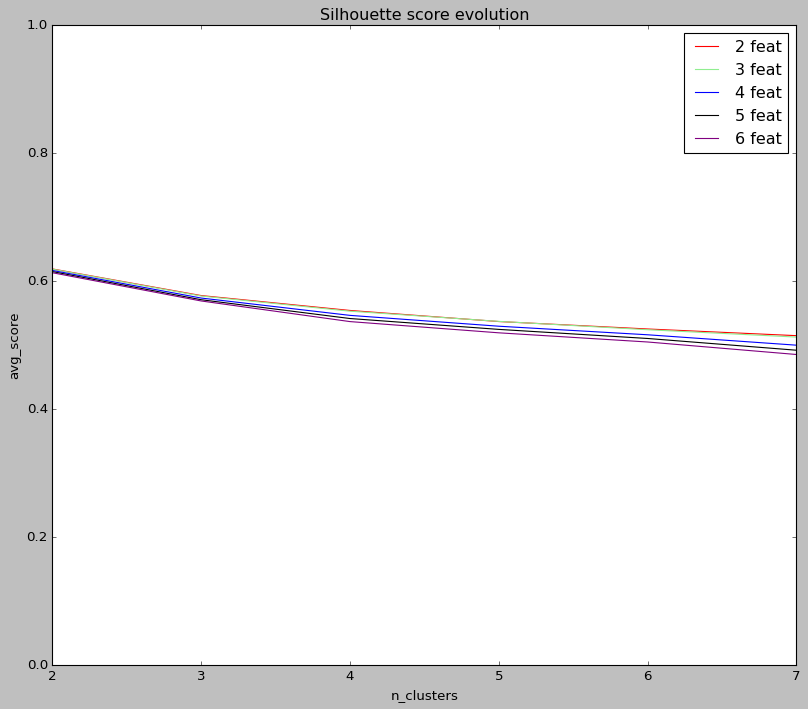

In [62]:
plt.figure(figsize=(12,10))
plt.plot(num_clusters, scores_2_feat, c='red', label='2 feat')
plt.plot(num_clusters, scores_3_feat, c='lightgreen', label='3 feat')
plt.plot(num_clusters, scores_4_feat, c='blue', label='4 feat')
plt.plot(num_clusters, scores_5_feat, c='black', label='5 feat')
plt.plot(num_clusters, scores_6_feat, c='purple', label='6 feat')
plt.legend()
plt.title('Silhouette score evolution')
plt.xlabel('n_clusters')
plt.ylabel('avg_score')
plt.xlim([2,7])
plt.ylim([0,1])